# Online Stochastic Gradient Descent Method

The update rule for the online gradient descent can be expressed as:

\begin{equation}
    \mathbf{W}_{\text{OL}} = -\eta \nabla E
\end{equation}

\begin{equation}
    \mathbf{W}_{\text{OL}} = -\eta \mathbf{W} \mathbf{x} \mathbf{x}^T
\end{equation}

Error is denoted by
\begin{equation}
    E = \frac{1}{2} \| y - d \|^2 = \frac{1}{2} \| (w - w^*) x \|^2 = \frac{1}{2} \| Wx \|^2
\end{equation}

Convergence rate using the learning rate of:
\begin{equation}
    \langle E_{OL}^{(t)} \rangle = \left(1 - 2\eta + (N + 2)\eta^2 \right)^t E^{(0)}
\end{equation}

\begin{equation}
    \eta_{OL} < \frac{2}{N + 2}
\end{equation}

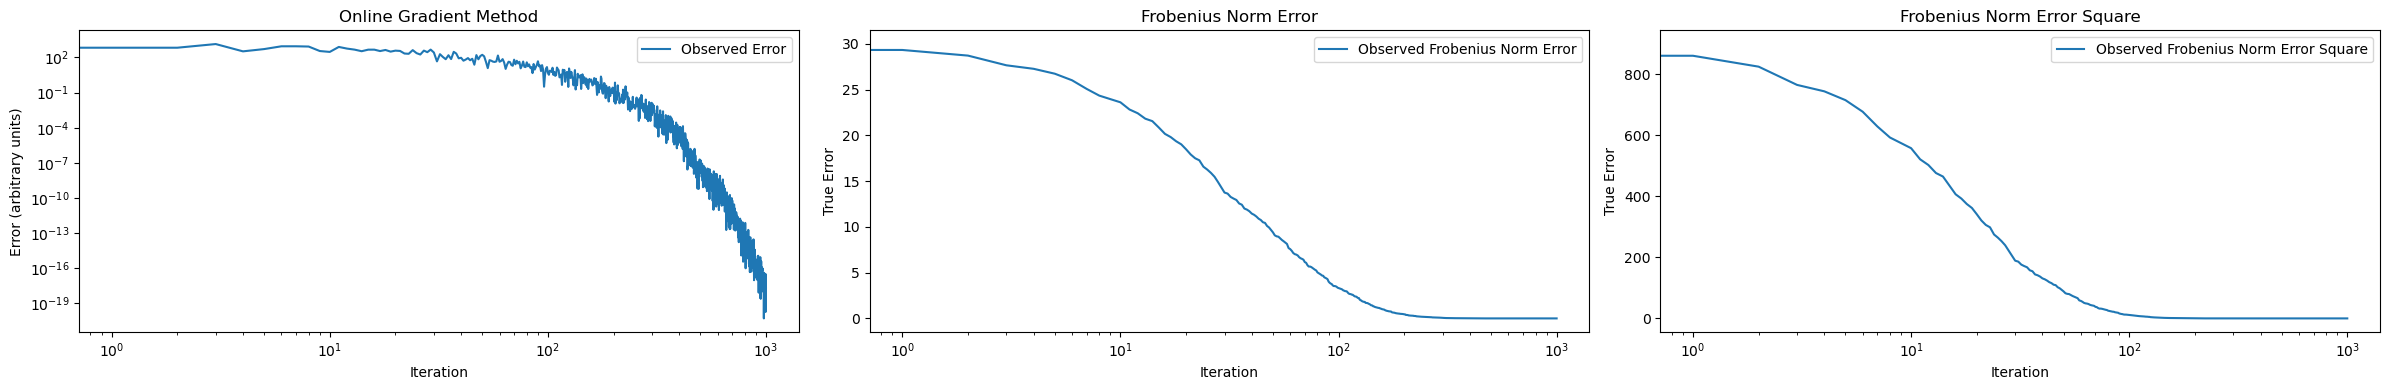

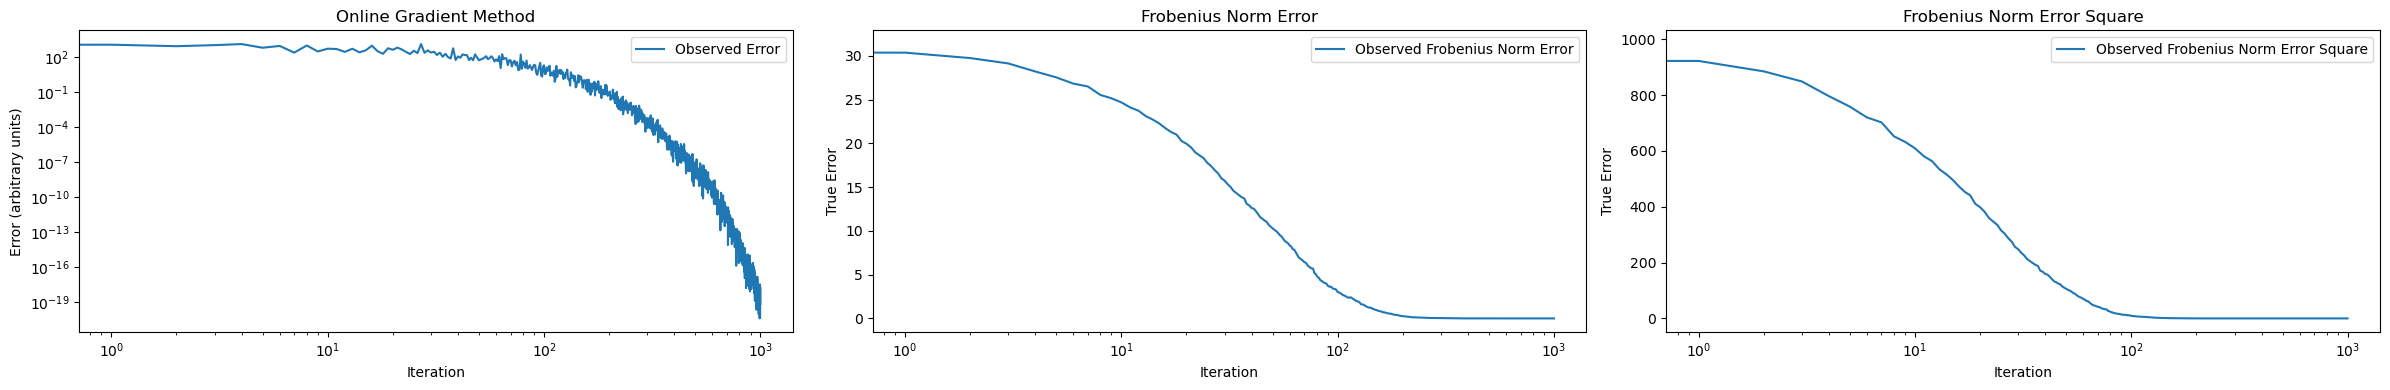

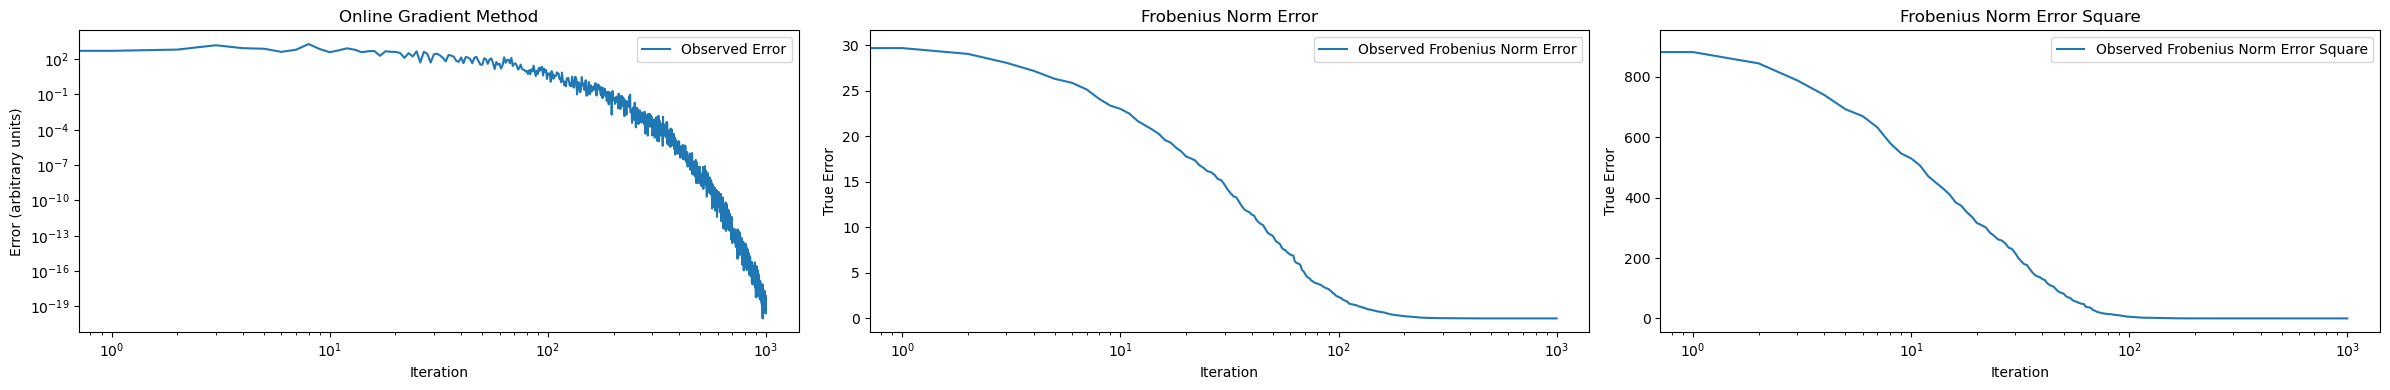

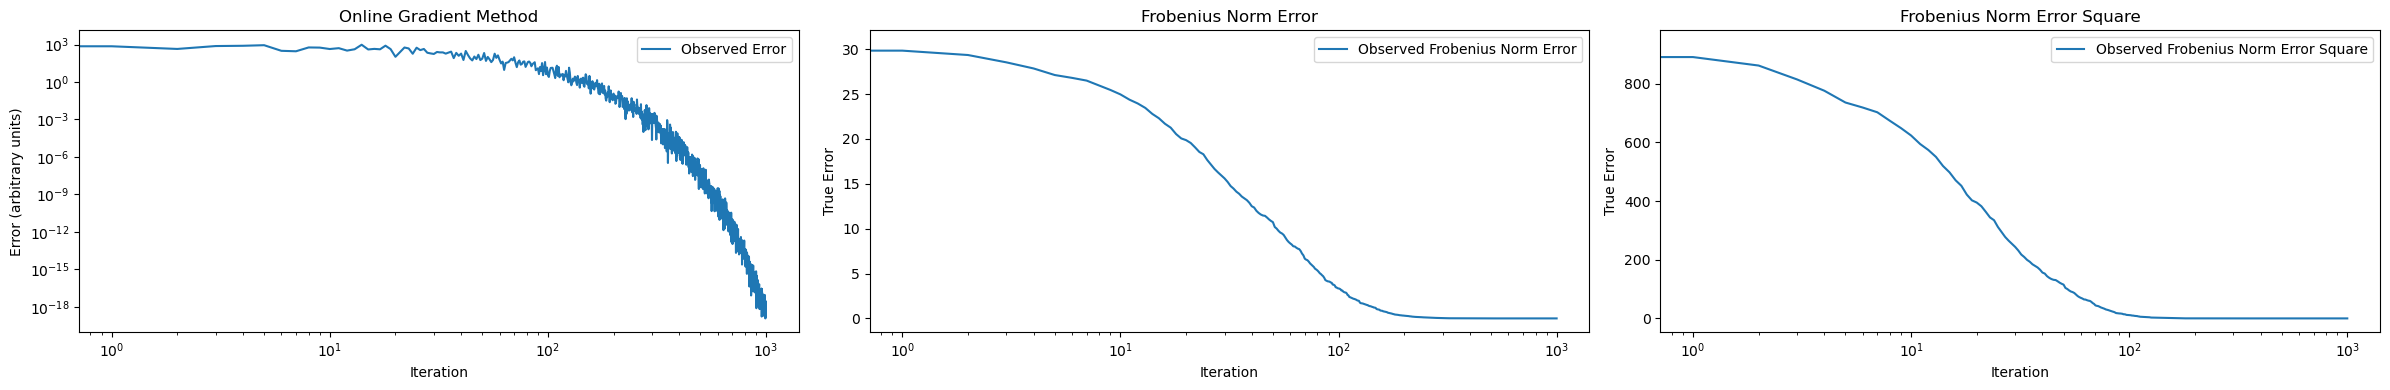

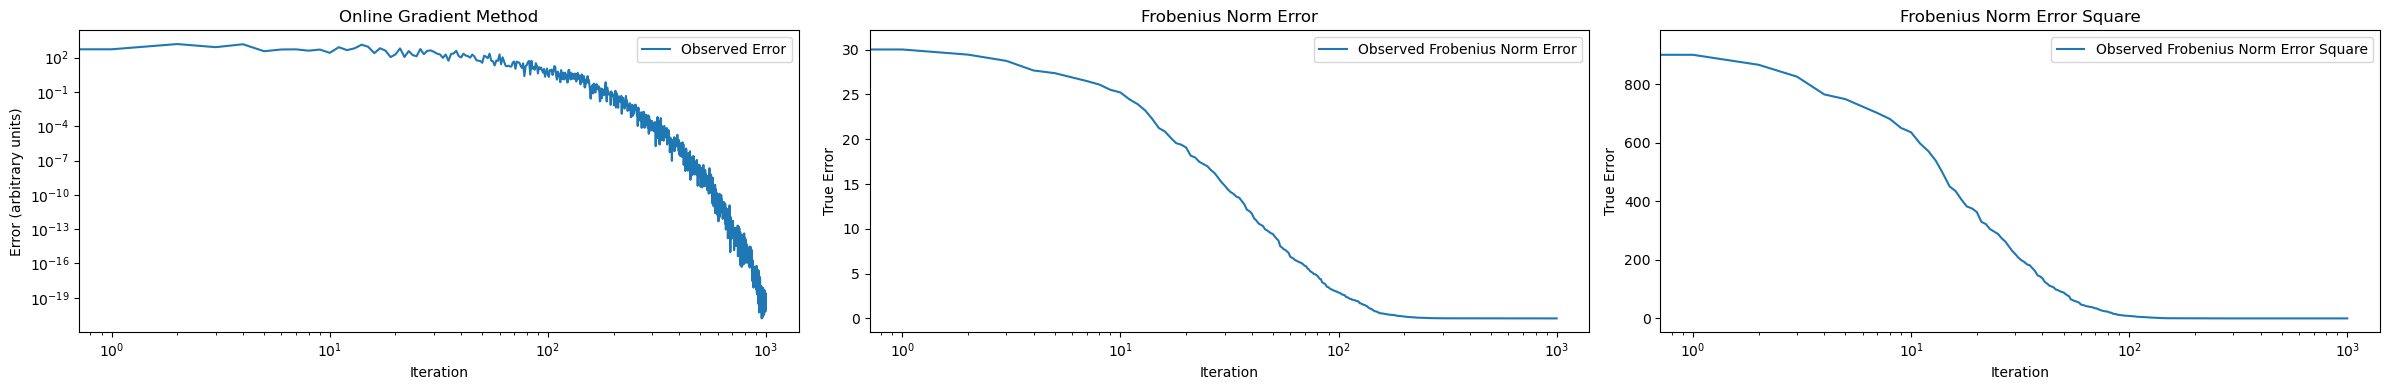

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def online_gradient_descent(W, x, d, alpha):
    y = np.dot(W, x)
    error = y - d
    gradient = np.outer(error, x)
    W -= alpha * gradient
    sqe = np.sum(error**2)
    return W, sqe

def frobenius_norm(m1, m2):
    difference_matrix = m1 - m2
    frobenius_norm = np.linalg.norm(difference_matrix, 'fro')
    return frobenius_norm

N = 20  # input units
M = 25  # output units
iterations = 1000
alpha = 1/(N+2)

for _ in range(5):
    W = np.random.randn(M, N)
    W_true = np.random.randn(M, N)
    errors = []
    true_errors = []
    true_errors_2 = []
    for _ in range(iterations):
        x = np.random.randn(N)
        d = np.dot(W_true, x)
        W, error = online_gradient_descent(W, x, d, alpha)
        errors.append(error)
        true_errors.append(frobenius_norm(W_true, W))
        true_errors_2.append(frobenius_norm(W_true, W)**2)

    fig, axes = plt.subplots(1, 3, figsize=(24, 4))

    axes[0].plot(errors, label='Observed Error')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Error (arbitrary units)')
    axes[0].set_xscale('log')
    axes[0].set_yscale('log')
    axes[0].set_title('Online Gradient Method')
    axes[0].legend()

    axes[1].plot(true_errors, label='Observed Frobenius Norm Error')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('True Error')
    axes[1].set_xscale('log')
    axes[1].set_title('Frobenius Norm Error')
    axes[1].legend()

    axes[2].plot(true_errors_2, label='Observed Frobenius Norm Error Square')
    axes[2].set_xlabel('Iteration')
    axes[2].set_ylabel('True Error')
    axes[2].set_xscale('log')
    axes[2].set_title('Frobenius Norm Error Square')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [3]:
np.isclose(W, W_true)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ T

# Online Node Perturbation Method

The update rule for node perturbation can be expressed as:

\begin{equation}
    \Delta \mathbf{W}_{\text{NP}} = - \frac{\eta}{\sigma^2} \left( \xi^T \mathbf{W} \mathbf{x} + \frac{1}{2} \xi^T \xi \right) \xi \mathbf{x}^T
\end{equation}

Or the equivalent format:

\begin{equation}
    \Delta \mathbf{W}_{\text{NP}} = -\frac{\eta}{\sigma^2} (E'_{NP} - E) \xi \mathbf{x}^T
\end{equation}

Or considerting the input's variance

\begin{equation}
    \Delta W_{NP} = \left( \frac{\eta}{\sigma^2} \gamma^4 \right) \left( \frac{\xi}{\gamma}^T W \frac{x}{\gamma} + \frac{1}{2} \frac{\xi}{\gamma}^T \frac{\xi}{\gamma} \right) \frac{\xi}{\gamma} \frac{x}{\gamma}^T
\end{equation}

Error is denoted by
\begin{equation}
    E'_{NP} = \frac{1}{2} \| Wx + \xi \|^2
\end{equation}

Convergence rate using the learning rate of:
\begin{equation}
    \langle E_{NP}^{(t)} \rangle = \left( E^{(0)} - \frac{\eta \sigma^2 (M + 2)(M + 4)MN}{8(2 - (N + 2)(M + 2)\eta)} \right) \cdot \left( 1 - 2\eta + (M + 2)(N + 2)\eta^2 \right)^t + \frac{\eta \sigma^2 (M + 2)(M + 4)MN}{8(2 - (M + 2)(N + 2)\eta)}
\end{equation}

\begin{equation}
    \eta_{NP} < \frac{2}{(M + 2)(N + 2)}
\end{equation}


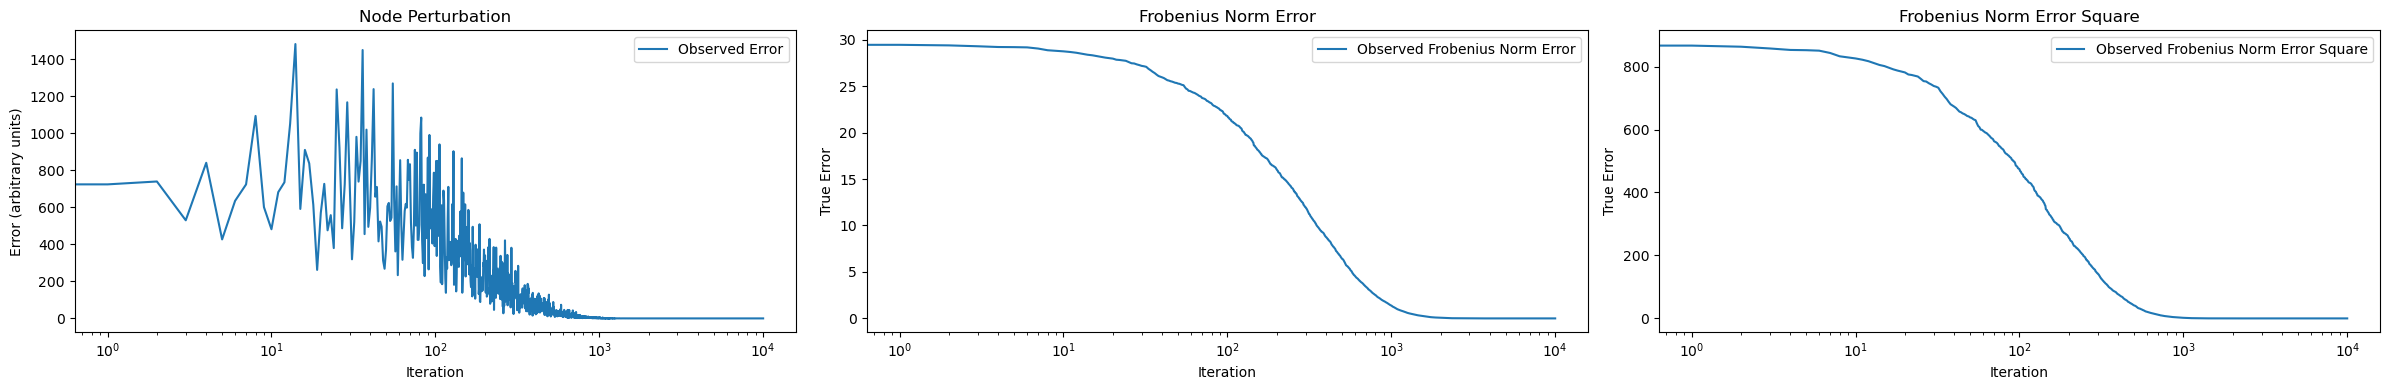

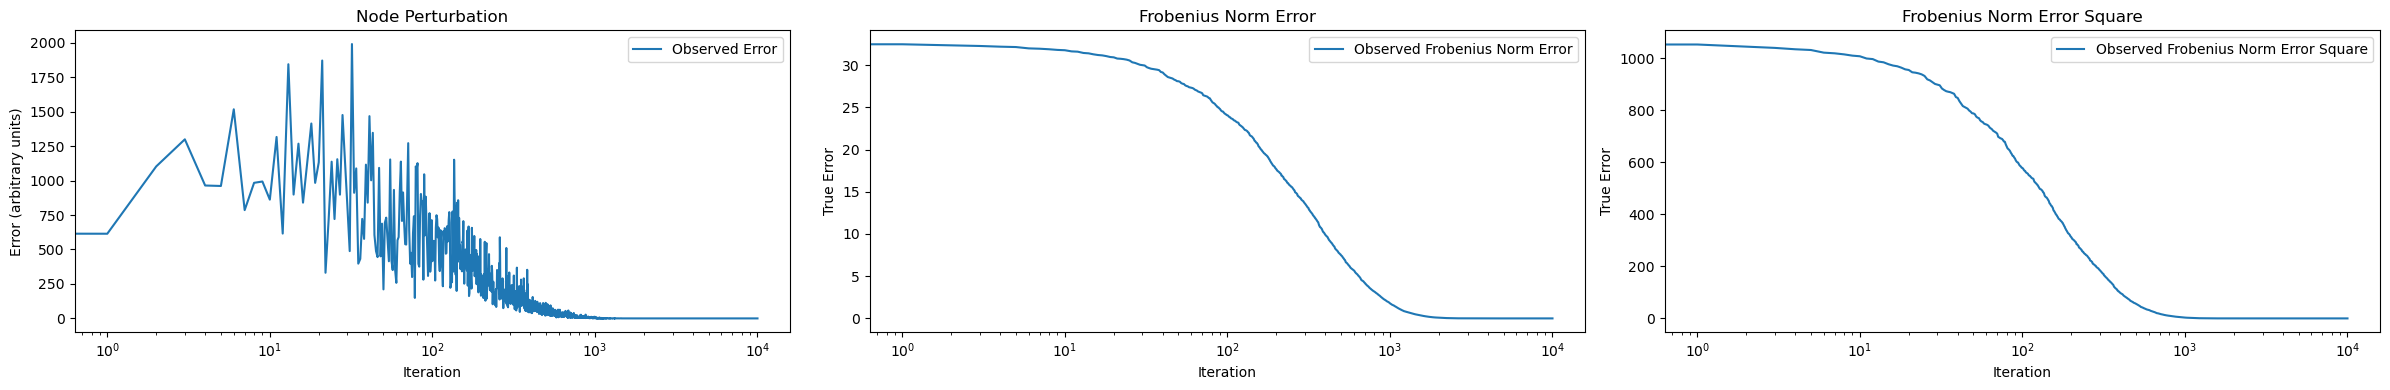

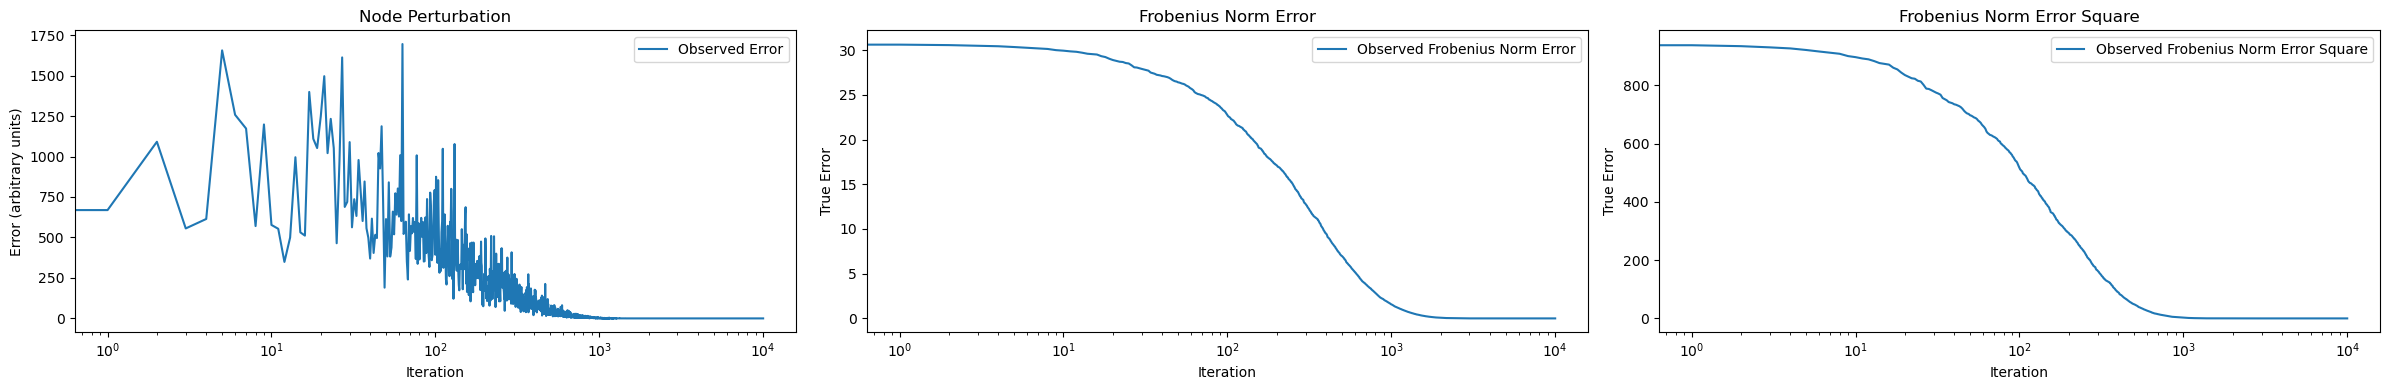

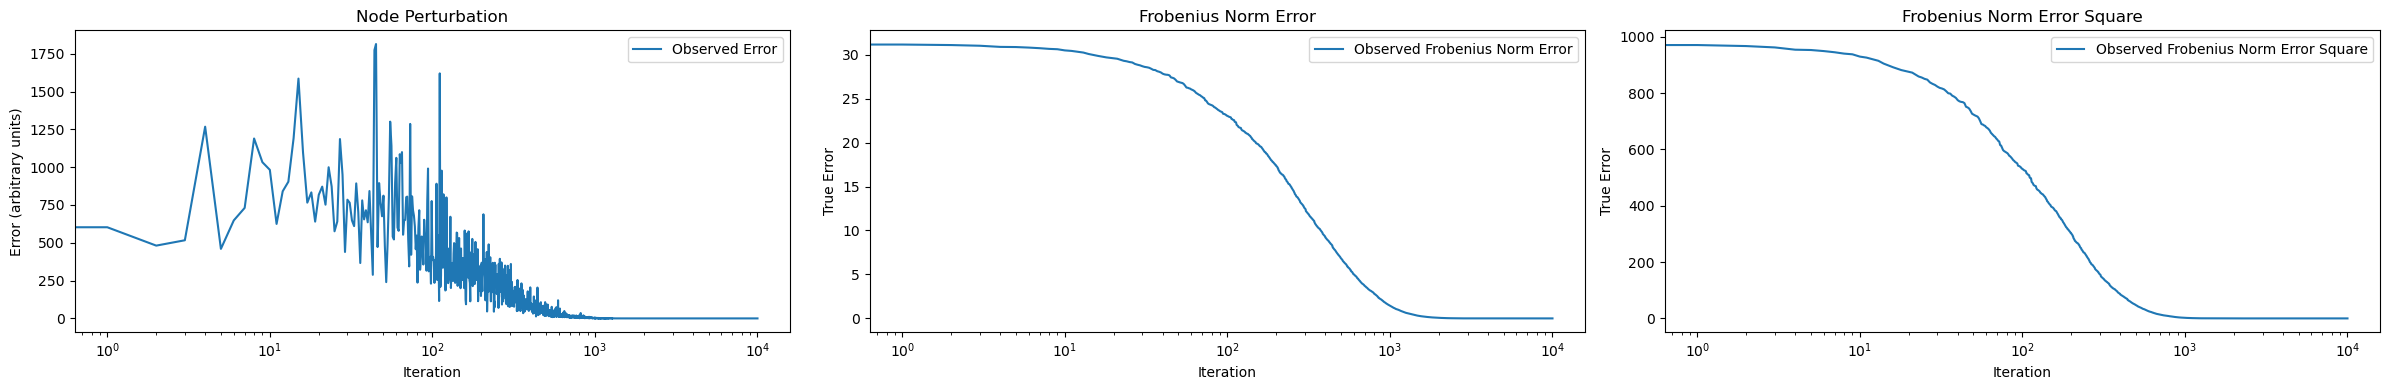

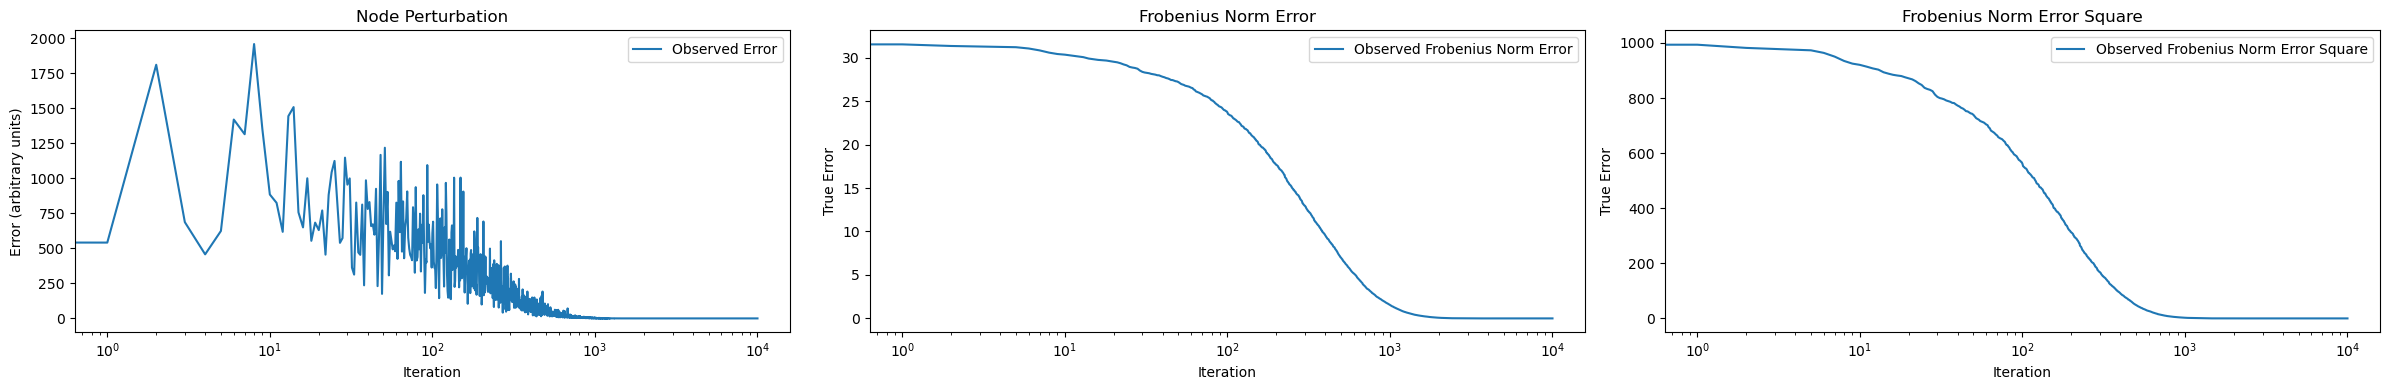

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def node_perturbation(W, x, d, eta, noise_std):
    '''
    xi/y shape: Mx1
    x shape: Nx1
    W shape: MxN

    np.dot(xi.T, np.dot(W, x)) becomes inf gradually

    '''
    xi = noise_std * np.random.randn(W.shape[0])
    y = np.dot(W, x)
    error = (y - d)**2
    error_np = (y + xi - d)**2

    #perturbation = np.dot((error_np - error), np.outer(xi, x.T))
    #perturbation = (np.dot(xi.T, np.dot(W, x)) + (1/2) * np.dot(xi.T, xi)) * np.outer(xi, x.T)
    perturbation = np.outer((error_np - error) * xi, x)

    W -= (eta / noise_std**2) * perturbation
    
    sqe = np.sum(error)
    
    return W, sqe

# Parameters
N = 20  # Number of inputs
M = 25  # Number of outputs
iterations = 10000
alpha = 1/((M+2)*(N+2))
noise_std = 1e-3

for _ in range(5):
    W = np.random.randn(M, N)
    W_true = np.random.randn(M, N)
    errors = []
    true_errors = []
    true_errors_2 = []
    for _ in range(iterations):
        x = np.random.randn(N)
        d = np.dot(W_true, x)
        W, error = node_perturbation(W, x, d, alpha, noise_std)
        errors.append(error)
        true_errors.append(np.linalg.norm(W_true - W, 'fro'))
        true_errors_2.append(np.linalg.norm(W_true - W, 'fro')**2)

    fig, axes = plt.subplots(1, 3, figsize=(24, 4))

    axes[0].plot(errors, label='Observed Error')
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Error (arbitrary units)')
    axes[0].set_xscale('log')
    axes[0].set_title('Node Perturbation')
    axes[0].legend()

    axes[1].plot(true_errors, label='Observed Frobenius Norm Error')
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('True Error')
    axes[1].set_xscale('log')
    axes[1].set_title('Frobenius Norm Error')
    axes[1].legend()

    axes[2].plot(true_errors_2, label='Observed Frobenius Norm Error Square')
    axes[2].set_xlabel('Iteration')
    axes[2].set_ylabel('True Error')
    axes[2].set_xscale('log')
    axes[2].set_title('Frobenius Norm Error Square')
    axes[2].legend()

    plt.tight_layout()
    plt.show()